<a href="https://colab.research.google.com/github/AkshithaRao123/Detecting-Signs-of-Depression/blob/main/SocialMedia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install empath

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import nltk
# from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
df_train = pd.read_csv('/content/train.csv')
df_train

,pid,text,labels
0,train_pid_7991,At this point just genuinely curious what sort...,0
1,train_pid_7992,I have literally tried everything.... : I'm st...,0
2,train_pid_7995,I'm really struggling : So I don't know how to...,0
3,train_pid_7996,My meds aren’t making my depression any better...,0
4,train_pid_7997,"Hi I'm unwell : I'm 21 now, ""vice ridden"", and...",0
...,...,...,...
6001,dev_pid_3724,What's even the point ? : [removed],2
6002,dev_pid_3725,I just want everyone to know that their not al...,2
6003,dev_pid_3726,I hope I get the coronavirus : I hope I get th...,2
6004,dev_pid_3727,Sometimes I really wonder if being less ugly w...,2


In [ ]:
df_train['labels'].unique()

array([0, 1, 2])

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6006 entries, 0 to 6005
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   pid     6006 non-null   object
 1   text    6006 non-null   object
 2   labels  6006 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 140.9+ KB


In [ ]:
df_train = df_train.drop(labels='pid', axis=1)
df_train

,text,labels
0,At this point just genuinely curious what sort...,0
1,I have literally tried everything.... : I'm st...,0
2,I'm really struggling : So I don't know how to...,0
3,My meds aren’t making my depression any better...,0
4,"Hi I'm unwell : I'm 21 now, ""vice ridden"", and...",0
...,...,...
6001,What's even the point ? : [removed],2
6002,I just want everyone to know that their not al...,2
6003,I hope I get the coronavirus : I hope I get th...,2
6004,Sometimes I really wonder if being less ugly w...,2


In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
corpus = []

for i in range(0,6006):
    texts = re.sub('[^a-zA-Z]', ' ', df_train['text'][i])
    # print(texts)
    ps = PorterStemmer()
    stopwordlist = stopwords.words('english')
    stopwordlist.remove('not')
    stopwordlist.remove("wasn")
    stopwordlist.remove("didn")
    # Stemming the words
    texts = [ps.stem(word) for word in texts.split() if not word in set(stopwordlist)]
    texts = ' '.join(texts)
    # print(texts)
    corpus.append(texts)
    # print(corpus)

In [ ]:
print(corpus)

['at point genuin curiou sort shit throw way it actual funni i use end everi previou year okay bad sure get much wors you go rock bottom get fuck unimagin way next year point i mostli dissoci exist noth bad fuck movi i absolut wait see shit hit fan the new endlessli creativ way fate come fuck never ceas amaz life yet fail exceed expect so time homeless anoth chronic ill or perhap famili final disown stay tune', 'i liter tri everyth i still f amp ked never get drop good news nadda oh smart sure went uni fat lot good i basic unemploy bi polar huge debt talent oh yeah one buy sh pretti okay joke relationship kid hous whi i poor loser my destini i feel curs i never christen but year i end struggl tear i done wait brighter day stroke good luck never happen i lose year go i lost famili not i ever i got move canada uk move time sinc watch world move ahead financi i spectat despit work hard not harder better life i give happi f amp king i hope last i final suck pull noos tight enough time push

In [ ]:
# Creating a Bag of Words
cv = TfidfVectorizer(max_features = 1500)
x_train = cv.fit_transform(corpus).toarray()
y_train = df_train.iloc[:,-1].values

In [ ]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
cv.vocabulary_

{'at': 98,
 'point': 984,
 'genuin': 553,
 'sort': 1221,
 'shit': 1161,
 'throw': 1335,
 'way': 1435,
 'it': 710,
 'actual': 16,
 'funni': 545,
 'use': 1403,
 'end': 430,
 'everi': 449,
 'previou': 1005,
 'year': 1488,
 'okay': 910,
 'bad': 117,
 'sure': 1284,
 'get': 554,
 'much': 863,
 'wors': 1476,
 'you': 1493,
 'go': 563,
 'rock': 1103,
 'bottom': 171,
 'fuck': 539,
 'next': 881,
 'mostli': 857,
 'exist': 466,
 'noth': 892,
 'movi': 862,
 'absolut': 4,
 'wait': 1419,
 'see': 1131,
 'hit': 640,
 'the': 1317,
 'new': 879,
 'come': 254,
 'never': 878,
 'amaz': 50,
 'life': 755,
 'yet': 1491,
 'fail': 479,
 'expect': 467,
 'so': 1203,
 'time': 1337,
 'homeless': 646,
 'anoth': 60,
 'chronic': 233,
 'ill': 671,
 'or': 925,
 'perhap': 959,
 'famili': 486,
 'final': 504,
 'stay': 1245,
 'liter': 762,
 'tri': 1369,
 'everyth': 453,
 'still': 1248,
 'amp': 52,
 'drop': 403,
 'good': 569,
 'news': 880,
 'oh': 908,
 'smart': 1199,
 'went': 1446,
 'uni': 1394,
 'fat': 489,
 'lot': 779,
 'basi

In [ ]:
vocabulary = [i for i in cv.vocabulary_]
print(vocabulary)

['at', 'point', 'genuin', 'sort', 'shit', 'throw', 'way', 'it', 'actual', 'funni', 'use', 'end', 'everi', 'previou', 'year', 'okay', 'bad', 'sure', 'get', 'much', 'wors', 'you', 'go', 'rock', 'bottom', 'fuck', 'next', 'mostli', 'exist', 'noth', 'movi', 'absolut', 'wait', 'see', 'hit', 'the', 'new', 'come', 'never', 'amaz', 'life', 'yet', 'fail', 'expect', 'so', 'time', 'homeless', 'anoth', 'chronic', 'ill', 'or', 'perhap', 'famili', 'final', 'stay', 'liter', 'tri', 'everyth', 'still', 'amp', 'drop', 'good', 'news', 'oh', 'smart', 'went', 'uni', 'fat', 'lot', 'basic', 'unemploy', 'huge', 'debt', 'talent', 'yeah', 'one', 'buy', 'pretti', 'joke', 'relationship', 'kid', 'hous', 'whi', 'poor', 'loser', 'my', 'feel', 'but', 'struggl', 'tear', 'done', 'day', 'luck', 'happen', 'lose', 'lost', 'not', 'ever', 'got', 'move', 'sinc', 'watch', 'world', 'ahead', 'financi', 'despit', 'work', 'hard', 'harder', 'better', 'give', 'happi', 'hope', 'last', 'suck', 'pull', 'enough', 'push', 'deep', 'also',

In [ ]:
# # Creating a Bag of Words
# from sklearn.feature_extraction.text import HashingVectorizer
# cv = HashingVectorizer()
# x_train = cv.fit_transform(corpus).toarray()
# y_train = df_train.iloc[:,-1].values

In [ ]:
x_train.shape

(6006, 1500)

In [ ]:
y_train.shape

(6006,)

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
# Training model using Gaussian Naive Bayes classifier
gnb.fit(x_train, y_train)

GaussianNB()

In [ ]:
df_test = pd.read_csv('test.csv')
df_test = df_test.drop("pid", axis=1)
df_test

,text,labels
0,Im scared : This is it. I lie to myself every ...,1
1,New to this but just wanted to vent : I just f...,1
2,I’m sad : It’s kinda always been an issue. I w...,1
3,Lonely but not alone. : All of my immediately ...,1
4,This year has been trash. : I dont know why I’...,1
...,...,...
3240,"Feeling lonely. : Hi reddit, I haven’t posted ...",0
3241,When would suicide be right? : So I got back f...,0
3242,Lowest I’ve ever been ever. : To make a long s...,0
3243,Does the Toxoplasma Gondii ruined my life ? (f...,0


In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []

for i in range(0,len(df_test['text'])):
    texts = re.sub('[^a-zA-Z]', ' ', df_test['text'][i])
    # print(texts)
    ps = PorterStemmer()
    stopwordlist = stopwords.words('english')
    stopwordlist.remove('not')
    stopwordlist.remove("wasn")
    stopwordlist.remove("didn")
    # Stemming the words
    texts = [ps.stem(word) for word in texts.split() if not word in set(stopwordlist)]
    texts = ' '.join(texts)
    # print(texts)
    corpus.append(texts)
    # print(corpus)

In [ ]:
# Creating a Bag of Words
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=1500, vocabulary=vocabulary)
x_test = cv.fit_transform(corpus).toarray()
y_test = df_test.iloc[:,-1].values

Accuracy:  0.4702619414483821


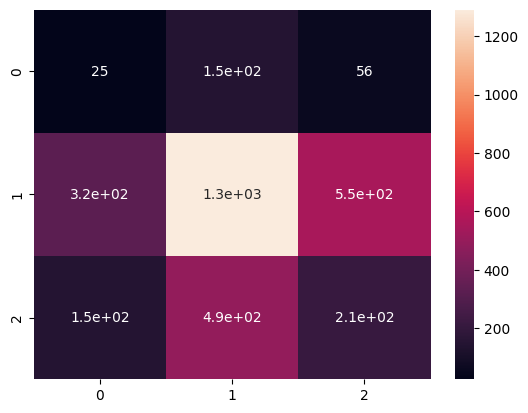

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,  recall_score, f1_score
y_pred = gnb.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(data=cm, annot=True)
print("Accuracy: ",accuracy_score(y_test, y_pred))

In [ ]:
precision_score(y_test, y_pred, average='macro')

0.32533506032314385

In [ ]:
recall_score(y_test, y_pred, average='macro')

0.3174985986369579

In [ ]:
f1_score(y_test, y_pred, average="macro")

0.3169937701711742

In [ ]:
results = pd.DataFrame(list(zip(df_test['text'], y_test, y_pred)), columns = "Text Predicted Actual".split())
results

,Text,Predicted,Actual
0,Im scared : This is it. I lie to myself every ...,1,1
1,New to this but just wanted to vent : I just f...,1,1
2,I’m sad : It’s kinda always been an issue. I w...,1,1
3,Lonely but not alone. : All of my immediately ...,1,1
4,This year has been trash. : I dont know why I’...,1,1
...,...,...,...
3240,"Feeling lonely. : Hi reddit, I haven’t posted ...",0,1
3241,When would suicide be right? : So I got back f...,0,1
3242,Lowest I’ve ever been ever. : To make a long s...,0,1
3243,Does the Toxoplasma Gondii ruined my life ? (f...,0,1


In [ ]:
from sklearn.svm import SVC
svm = SVC()
# Training using SVM
svm.fit(x_train, y_train)

SVC()

Accuracy:  0.47889060092449925


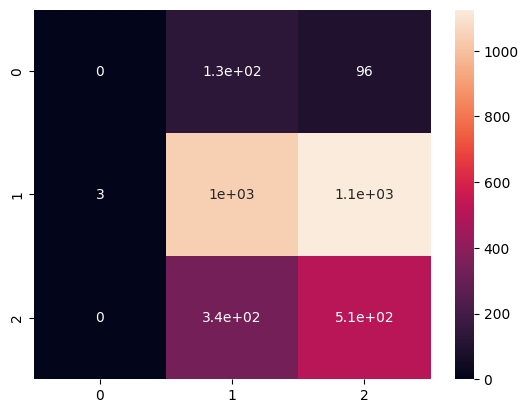

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = svm.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(data=cm, annot=True)
print("Accuracy: ",accuracy_score(y_test, y_pred))

In [ ]:
precision_score(y_test, y_pred, average='macro')

0.32872201775077325

In [ ]:
recall_score(y_test, y_pred, average='macro')

0.36163250171803374

In [ ]:
f1_score(y_test, y_pred, average="macro")

0.3211962822047661

In [ ]:
results = pd.DataFrame(list(zip(df_test['text'], y_test, y_pred)), columns = "Text Predicted Actual".split())
results

,Text,Predicted,Actual
0,Im scared : This is it. I lie to myself every ...,1,2
1,New to this but just wanted to vent : I just f...,1,1
2,I’m sad : It’s kinda always been an issue. I w...,1,1
3,Lonely but not alone. : All of my immediately ...,1,2
4,This year has been trash. : I dont know why I’...,1,1
...,...,...,...
3240,"Feeling lonely. : Hi reddit, I haven’t posted ...",0,1
3241,When would suicide be right? : So I got back f...,0,1
3242,Lowest I’ve ever been ever. : To make a long s...,0,1
3243,Does the Toxoplasma Gondii ruined my life ? (f...,0,1


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

Accuracy:  0.5183359013867489


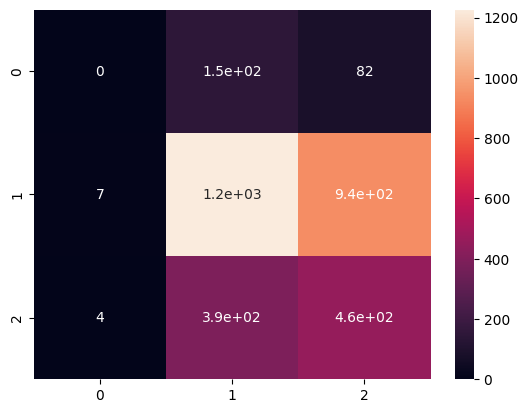

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = rfc.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(data=cm, annot=True)
print("Accuracy: ",accuracy_score(y_test, y_pred))

In [ ]:
results = pd.DataFrame(list(zip(df_test['text'], y_test, y_pred)), columns = "Text Predicted Actual".split())
results

,Text,Predicted,Actual
0,Im scared : This is it. I lie to myself every ...,1,2
1,New to this but just wanted to vent : I just f...,1,1
2,I’m sad : It’s kinda always been an issue. I w...,1,1
3,Lonely but not alone. : All of my immediately ...,1,1
4,This year has been trash. : I dont know why I’...,1,1
...,...,...,...
3240,"Feeling lonely. : Hi reddit, I haven’t posted ...",0,1
3241,When would suicide be right? : So I got back f...,0,1
3242,Lowest I’ve ever been ever. : To make a long s...,0,1
3243,Does the Toxoplasma Gondii ruined my life ? (f...,0,1


better

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc_68 = RandomForestClassifier(random_state=68)
rfc_68.fit(x_train, y_train)

RandomForestClassifier(random_state=68)

Accuracy:  0.5183359013867489


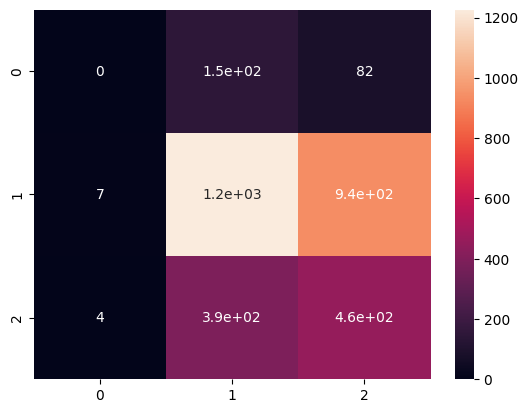

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = rfc.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(data=cm, annot=True)
print("Accuracy: ",accuracy_score(y_test, y_pred))

In [ ]:
precision_score(y_test, y_pred, average= "macro")

0.3353177295341474

In [ ]:
recall_score(y_test, y_pred, average= "macro")

0.3676577618877783

In [ ]:
f1_score(y_test, y_pred, average= "macro")

0.3389474104195289

In [ ]:
results = pd.DataFrame(list(zip(df_test['text'], y_test, y_pred)), columns = "Text Predicted Actual".split())
results

,Text,Predicted,Actual
0,Im scared : This is it. I lie to myself every ...,1,2
1,New to this but just wanted to vent : I just f...,1,1
2,I’m sad : It’s kinda always been an issue. I w...,1,1
3,Lonely but not alone. : All of my immediately ...,1,1
4,This year has been trash. : I dont know why I’...,1,1
...,...,...,...
3240,"Feeling lonely. : Hi reddit, I haven’t posted ...",0,1
3241,When would suicide be right? : So I got back f...,0,1
3242,Lowest I’ve ever been ever. : To make a long s...,0,1
3243,Does the Toxoplasma Gondii ruined my life ? (f...,0,1


betterr

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion="entropy", random_state=1149)
rfc.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=1149)

Accuracy:  0.47303543913713403


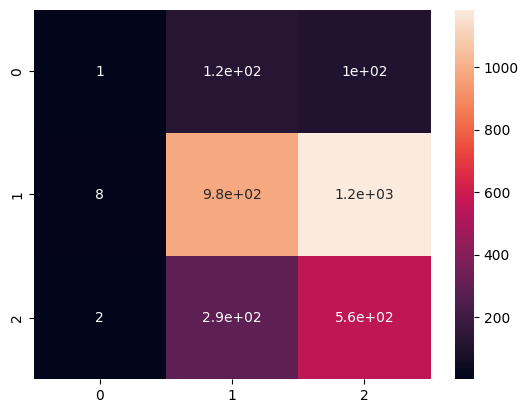

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = rfc.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(data=cm, annot=True)
print("Accuracy: ",accuracy_score(y_test, y_pred))

In [ ]:
results = pd.DataFrame(list(zip(df_test['text'], y_test, y_pred)), columns = "Text Predicted Actual".split())
results

,Text,Predicted,Actual
0,Im scared : This is it. I lie to myself every ...,1,2
1,New to this but just wanted to vent : I just f...,1,2
2,I’m sad : It’s kinda always been an issue. I w...,1,2
3,Lonely but not alone. : All of my immediately ...,1,2
4,This year has been trash. : I dont know why I’...,1,1
...,...,...,...
3240,"Feeling lonely. : Hi reddit, I haven’t posted ...",0,1
3241,When would suicide be right? : So I got back f...,0,1
3242,Lowest I’ve ever been ever. : To make a long s...,0,1
3243,Does the Toxoplasma Gondii ruined my life ? (f...,0,1


lesser accuracy

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
rfc = ExtraTreesClassifier()
rfc.fit(x_train, y_train)

ExtraTreesClassifier()

Accuracy:  0.6354391371340524


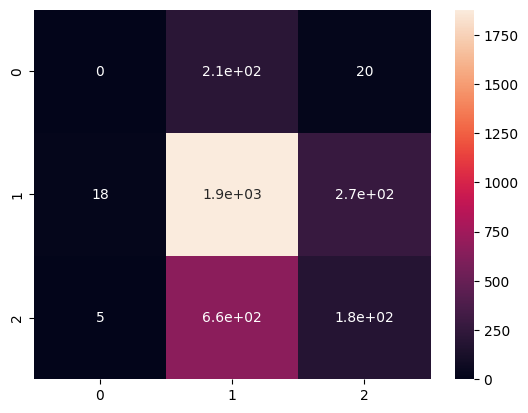

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = rfc.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(data=cm, annot=True)
print("Accuracy: ",accuracy_score(y_test, y_pred))

In [ ]:
results = pd.DataFrame(list(zip(df_test['text'], y_test, y_pred)), columns = "Text Predicted Actual".split())
results

,Text,Predicted,Actual
0,Im scared : This is it. I lie to myself every ...,1,1
1,New to this but just wanted to vent : I just f...,1,1
2,I’m sad : It’s kinda always been an issue. I w...,1,1
3,Lonely but not alone. : All of my immediately ...,1,1
4,This year has been trash. : I dont know why I’...,1,1
...,...,...,...
3240,"Feeling lonely. : Hi reddit, I haven’t posted ...",0,1
3241,When would suicide be right? : So I got back f...,0,1
3242,Lowest I’ve ever been ever. : To make a long s...,0,1
3243,Does the Toxoplasma Gondii ruined my life ? (f...,0,2


sometimes very good but not reproducible

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

Accuracy:  0.6354391371340524


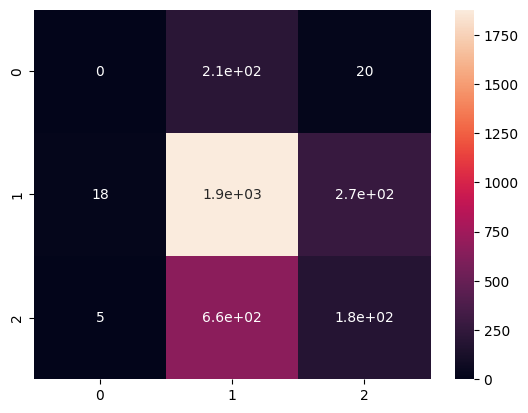

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = rfc.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(data=cm, annot=True)
print("Accuracy: ",accuracy_score(y_test, y_pred))

In [ ]:
print(precision_score(y_test, y_pred, average= "macro"))
print(recall_score(y_test, y_pred, average= "macro"))
print(f1_score(y_test, y_pred, average= "macro"))

0.35683619035586506
0.36117870885055575
0.3476917434360443


In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train, y_train)

MultinomialNB()

Accuracy:  0.5016949152542373


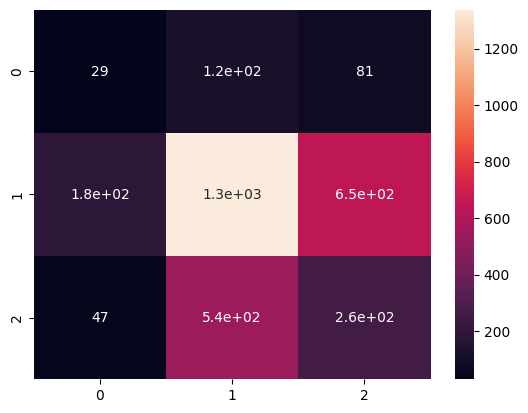

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = mnb.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(data=cm, annot=True)
print("Accuracy: ",accuracy_score(y_test, y_pred))

In [ ]:
print(precision_score(y_test, y_pred, average= "macro"))
print(recall_score(y_test, y_pred, average= "macro"))
print(f1_score(y_test, y_pred, average= "macro"))

0.33537161792422704
0.3442507831685044
0.30051185135910974


In [ ]:
del x_test
del x_train

In [ ]:
from empath import Empath
lexicon = Empath()

In [ ]:
empath_encoded_train = []

for i in range(0,len(df_train['text'])):
  analysis = lexicon.analyze(df_train['text'][i], normalize=True)
  array = [value for value in analysis.values()]
  empath_encoded_train.append(array)
  del analysis
  del array

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=68)
rfc.fit(empath_encoded_train, y_train)

RandomForestClassifier(random_state=68)

In [ ]:
empath_encoded_test = []

for i in range(0,len(df_test['text'])):
  analysis = lexicon.analyze(df_test['text'][i], normalize=True)
  array = [value for value in analysis.values()]
  empath_encoded_test.append(array)
  del analysis
  del array

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=56)
rfc.fit(empath_encoded_train, y_train)

RandomForestClassifier(random_state=56)

Accuracy:  0.6348228043143297


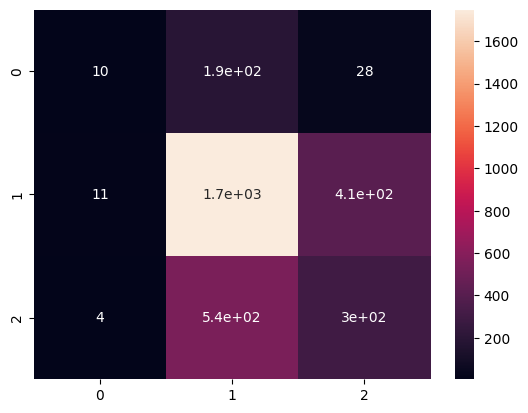

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = rfc.predict(empath_encoded_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(data=cm, annot=True)
print("Accuracy: ",accuracy_score(y_test, y_pred))

In [ ]:
precision_score(y_test, y_pred, average= "macro")

0.5041775762909388

In [ ]:
recall_score(y_test, y_pred, average= "macro")

0.4017249527626577

In [ ]:
f1_score(y_test, y_pred, average="macro")

0.403572985064745

In [ ]:
results = pd.DataFrame(list(zip(df_test['text'], y_test, y_pred)), columns = "Text Predicted Actual".split())
results

,Text,Predicted,Actual
0,Im scared : This is it. I lie to myself every ...,1,1
1,New to this but just wanted to vent : I just f...,1,1
2,I’m sad : It’s kinda always been an issue. I w...,1,1
3,Lonely but not alone. : All of my immediately ...,1,1
4,This year has been trash. : I dont know why I’...,1,1
...,...,...,...
3240,"Feeling lonely. : Hi reddit, I haven’t posted ...",0,1
3241,When would suicide be right? : So I got back f...,0,1
3242,Lowest I’ve ever been ever. : To make a long s...,0,1
3243,Does the Toxoplasma Gondii ruined my life ? (f...,0,1


In [ ]:
import joblib

joblib.dump(rfc, "text_classification.joblib")

['text_classification.joblib']

In [ ]:
model = joblib.load("text_classification.joblib")
y_pred = model.predict(empath_encoded_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=68)
dtc.fit(empath_encoded_train, y_train)

DecisionTreeClassifier(random_state=68)

Accuracy:  0.4711864406779661


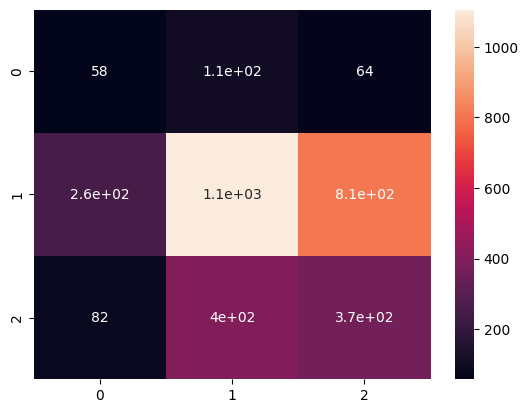

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = dtc.predict(empath_encoded_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(data=cm, annot=True)
print("Accuracy: ",accuracy_score(y_test, y_pred))

In [ ]:
print(precision_score(y_test, y_pred, average= "macro"))
print(recall_score(y_test, y_pred, average= "macro"))
print(f1_score(y_test, y_pred, average= "macro"))

0.3760481106122282
0.3984803661903176
0.3738648680539716


In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(empath_encoded_train, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = mnb.predict(empath_encoded_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(data=cm, annot=True, )
print("Accuracy: ",accuracy_score(y_test, y_pred))

In [ ]:
print(precision_score(y_test, y_pred, average= "macro"))
print(recall_score(y_test, y_pred, average= "macro"))
print(f1_score(y_test, y_pred, average= "macro"))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(weights='distance', n_neighbors=49)
knn.fit(empath_encoded_train, y_train)

KNeighborsClassifier(n_neighbors=49, weights='distance')

Accuracy:  0.6579352850539292


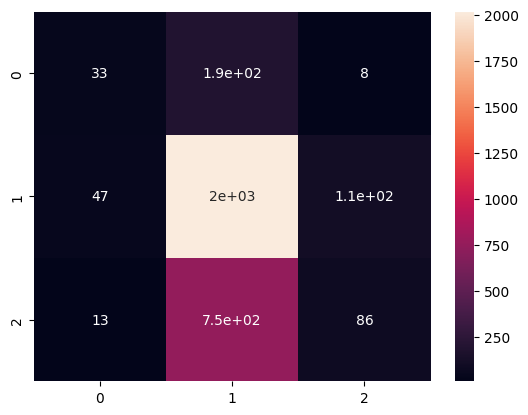

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = knn.predict(empath_encoded_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(data=cm, annot=True, )
print("Accuracy: ",accuracy_score(y_test, y_pred))

In [ ]:
print(precision_score(y_test, y_pred, average= "macro"))
print(recall_score(y_test, y_pred, average= "macro"))
print(f1_score(y_test, y_pred, average= "macro"))

0.4892551796485707
0.3918708391192496
0.38569194516040634
